# Stage 1.2 Simple data analysis

---

---
## Contents
1. Simple plots for happiness dataset
2. Summary Statistics
    - [Overall](#Overall)
    - [By Region](#By_region)
    - [By Time and Region](#By_Time_and_Region)

In [1]:
import requests
import json
import pandas as pd
import re
import math
import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', 50) # show all columns
pd.set_option('display.max_rows', 500) # show all rows
from matplotlib.colors import LogNorm

#### load the combined dataset
Output from final dataset

In [2]:
df = pd.read_csv('../data/final_data.csv')

## Simple plots for happiness dataset
Based on 44 countries


In [3]:
countries = df['LOCATION'].unique() 
len(countries)

44

### Happiness
Lower rank means more happiness!

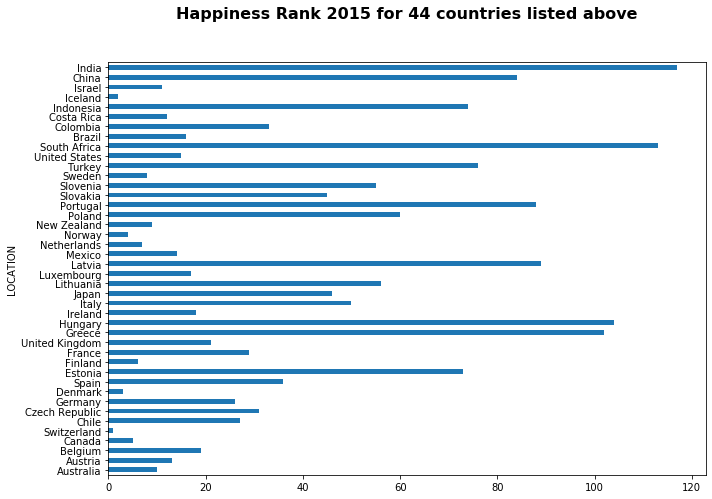

In [4]:
fig, ax = plt.subplots(figsize=(10,7))

countries = df['LOCATION'].unique() 
sub_df = df[df.LOCATION.isin(countries)].drop('Region',axis=1).set_index('LOCATION')
sub_df = sub_df[sub_df.TIME ==2015]

sub_df['Happiness Rank'].plot(kind='barh')
ax.text(x=0.5, y=1.1, s='Happiness Rank 2015 for 44 countries listed above', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
fig.tight_layout()
plt.show()

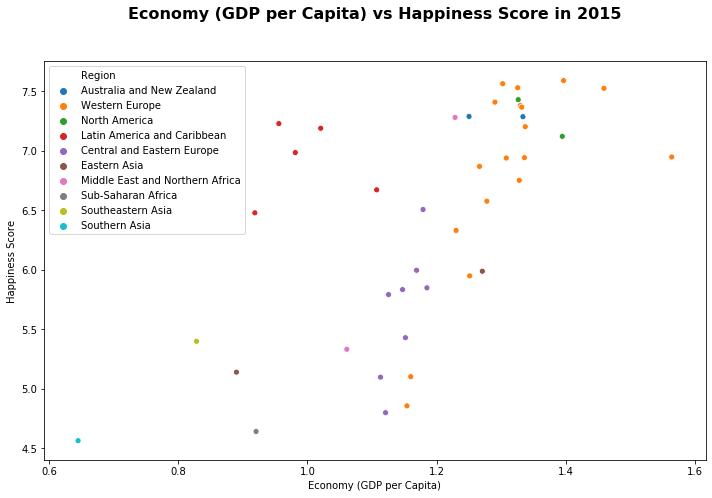

In [5]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot("Economy (GDP per Capita)","Happiness Score",hue='Region', data=df[df['TIME'] == 2015])
ax.text(x=0.5, y=1.1, s='Economy (GDP per Capita) vs Happiness Score in 2015', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.ylim(0, 8)
#plt.xlim(0, 1.8)

fig.tight_layout()
plt.show()

Positive (linear) relationship between GDP and happiness score

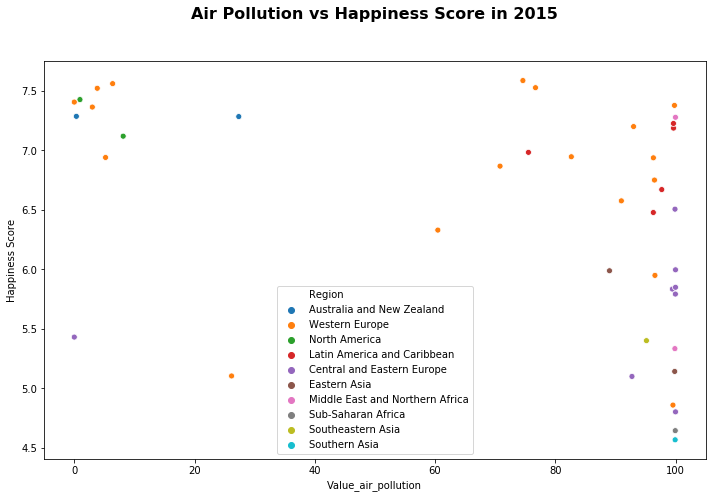

In [6]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot("Value_air_pollution","Happiness Score",hue='Region', data=df[df['TIME'] == 2015])
ax.text(x=0.5, y=1.1, s='Air Pollution vs Happiness Score in 2015', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.ylim(0, 10)
#plt.xlim(0, 110)

fig.tight_layout()
plt.show()


We can see that, the countries with lower air pollution are more likely to have higher happiness score

## Summary Statistics
- Overall
- By Region
- By Time and Region

### Overall

In [7]:
#Country with lowest and highest happiness scores for each year 
idx1 = df[df["TIME"] == 2015]["Happiness Score"].idxmin()
print(df.loc[idx1][["LOCATION", "Happiness Score"]])

idx2 = df[df["TIME"] == 2016]["Happiness Score"].idxmin()
print(df.loc[idx2][["LOCATION", "Happiness Score"]])

idx3 = df[df["TIME"] == 2017]["Happiness Score"].idxmin()
print(df.loc[idx3][["LOCATION", "Happiness Score"]])

idx1 = df[df["TIME"] == 2015]["Happiness Score"].idxmax()
print(df.loc[idx1][["LOCATION", "Happiness Score"]])

idx2 = df[df["TIME"] == 2016]["Happiness Score"].idxmax()
print(df.loc[idx2][["LOCATION", "Happiness Score"]])

idx3 = df[df["TIME"] == 2017]["Happiness Score"].idxmax()
print(df.loc[idx3][["LOCATION", "Happiness Score"]])

LOCATION           India
Happiness Score    4.565
Name: 124, dtype: object
LOCATION           India
Happiness Score    4.404
Name: 125, dtype: object
LOCATION           South Africa
Happiness Score           4.829
Name: 96, dtype: object
LOCATION           Switzerland
Happiness Score          7.587
Name: 12, dtype: object
LOCATION           Denmark
Happiness Score      7.526
Name: 24, dtype: object
LOCATION           Norway
Happiness Score     7.537
Name: 73, dtype: object


In [8]:
for column in df.columns:
    print(column)
    print(df[column].describe())
    print('------------------------')

LOCATION
count           126
unique           44
top       Australia
freq              3
Name: LOCATION, dtype: object
------------------------
TIME
count     126.000000
mean     2015.992063
std         0.814823
min      2015.000000
25%      2015.000000
50%      2016.000000
75%      2017.000000
max      2017.000000
Name: TIME, dtype: float64
------------------------
Value_disposable_income
count      126.000000
mean     26790.265885
std       8531.395268
min       9090.913293
25%      19300.931047
50%      26408.843693
75%      32293.550618
max      50203.258403
Name: Value_disposable_income, dtype: float64
------------------------
Value_adult_education
count    126.000000
mean      33.027393
std       11.438286
min        6.979802
25%       23.258045
50%       34.442646
75%       42.272240
max       56.714520
Name: Value_adult_education, dtype: float64
------------------------
Value_alcohol_consumption
count    126.000000
mean       8.186070
std        3.051071
min        0.300000
25%

### By Region

In [9]:
for region in df["Region"].unique():
    sub_data = df[df['Region']==region]
    print(region)
    print()
    for column in df.columns:
        print(column)
        print()
        print(sub_data[column].describe())
        print('------------------------')
    print()
    print()

Australia and New Zealand

LOCATION

count             6
unique            2
top       Australia
freq              3
Name: LOCATION, dtype: object
------------------------
TIME

count       6.000000
mean     2016.000000
std         0.894427
min      2015.000000
25%      2015.250000
50%      2016.000000
75%      2016.750000
max      2017.000000
Name: TIME, dtype: float64
------------------------
Value_disposable_income

count        6.000000
mean     32263.028270
std       7168.323201
min      25750.109794
25%      25750.109794
50%      31745.142436
75%      38429.179818
max      39928.817097
Name: Value_disposable_income, dtype: float64
------------------------
Value_adult_education

count     6.000000
mean     40.005739
std       4.595336
min      34.040531
25%      36.638962
50%      40.309594
75%      43.530114
max      45.355675
Name: Value_adult_education, dtype: float64
------------------------
Value_alcohol_consumption

count    6.000000
mean     9.175000
std      0.426321
min  

count    54.000000
mean      1.407903
std       0.120931
min       1.154060
25%       1.326090
50%       1.415685
75%       1.481946
max       1.741944
Name: Economy (GDP per Capita), dtype: float64
------------------------
Family

count    54.000000
mean      1.272839
std       0.192087
min       0.754730
25%       1.130748
50%       1.287365
75%       1.440927
max       1.610574
Name: Family, dtype: float64
------------------------
Health (Life Expectancy)

count    54.000000
mean      0.852261
std       0.048244
min       0.792566
25%       0.810323
50%       0.844778
75%       0.889073
max       0.955620
Name: Health (Life Expectancy), dtype: float64
------------------------
Freedom

count    54.000000
mean      0.522199
std       0.147687
min       0.058220
25%       0.502318
50%       0.569403
75%       0.615813
max       0.669730
Name: Freedom, dtype: float64
------------------------
Trust (Government Corruption)

count    54.000000
mean      0.245551
std       0.139170
min     

count    24.000000
mean      8.357143
std       1.666178
min       5.500000
25%       7.400000
50%       8.428571
75%       9.575000
max      11.300000
Name: income_inequality, dtype: float64
------------------------
unemployment

count    24.000000
mean      7.638095
std       1.696153
min       4.300000
25%       6.800000
50%       7.638095
75%       9.025000
max      11.500000
Name: unemployment, dtype: float64
------------------------
HDI_value

count    21.000000
mean      0.858429
std       0.017792
min       0.834000
25%       0.847000
50%       0.855000
75%       0.866000
max       0.896000
Name: HDI_value, dtype: float64
------------------------
Region

count                             24
unique                             1
top       Central and Eastern Europe
freq                              24
Name: Region, dtype: object
------------------------
Happiness Score

count    24.000000
mean      5.780667
std       0.441844
min       4.800000
25%       5.549250
50%       5.8230

count     5.000000
mean     66.213333
std       2.372832
min      64.000000
25%      64.333333
50%      66.100000
75%      66.700000
max      69.933333
Name: Value_overweight_population, dtype: float64
------------------------
Value_avg_annual_hours

count       7.000000
mean     1874.762500
std        41.455785
min      1832.000000
25%      1832.000000
50%      1891.867500
75%      1906.695000
max      1922.080000
Name: Value_avg_annual_hours, dtype: float64
------------------------
Happiness Rank

count     7.000000
mean     41.428571
std      31.952345
min      11.000000
25%      11.000000
50%      34.000000
75%      72.500000
max      78.000000
Name: Happiness Rank, dtype: float64
------------------------
HDI Rank (2017)

count     2.000000
mean     43.000000
std      29.698485
min      22.000000
25%      32.500000
50%      43.000000
75%      53.500000
max      64.000000
Name: HDI Rank (2017), dtype: float64
------------------------
income_inequality

count     7.000000
mean     14

Name: Freedom, dtype: float64
------------------------
Trust (Government Corruption)

count    3.000000
mean     0.006179
std      0.008076
min      0.000000
25%      0.001610
50%      0.003220
75%      0.009269
max      0.015317
Name: Trust (Government Corruption), dtype: float64
------------------------
Generosity

count    3.000000
mean     0.564088
std      0.048187
min      0.515350
25%      0.540280
50%      0.565210
75%      0.588457
max      0.611705
Name: Generosity, dtype: float64
------------------------
Dystopia Residual

count    3.000000
mean     1.775059
std      0.310810
min      1.429477
25%      1.646733
50%      1.863990
75%      1.947850
max      2.031710
Name: Dystopia Residual, dtype: float64
------------------------


Southern Asia

LOCATION

count         2
unique        1
top       India
freq          2
Name: LOCATION, dtype: object
------------------------
TIME

count       2.000000
mean     2015.500000
std         0.707107
min      2015.000000
25%      2015.2

### By region and time

In [10]:
interested_columns = ["Happiness Score", "HDI_value", "unemployment", "income_inequality",
                   "Value_disposable_income", "Value_adult_education"]
for time in df["TIME"].unique():
    for region in df["Region"].unique():
        sub_data = df[(df['Region']==region) & (df["TIME"]==time)]
        print(str(time) + " | " + region)
        print()
        for column in interested_columns:
            print(column)
            print()
            print(sub_data[column].describe())
            print('------------------------')
        print()
        print()

2015 | Australia and New Zealand

Happiness Score

count    2.000000
mean     7.285000
std      0.001414
min      7.284000
25%      7.284500
50%      7.285000
75%      7.285500
max      7.286000
Name: Happiness Score, dtype: float64
------------------------
HDI_value

count    2.000000
mean     0.925000
std      0.015556
min      0.914000
25%      0.919500
50%      0.925000
75%      0.930500
max      0.936000
Name: HDI_value, dtype: float64
------------------------
unemployment

count    2.000000
mean     5.750000
std      0.494975
min      5.400000
25%      5.575000
50%      5.750000
75%      5.925000
max      6.100000
Name: unemployment, dtype: float64
------------------------
income_inequality

count    2.000000
mean     7.950000
std      0.070711
min      7.900000
25%      7.925000
50%      7.950000
75%      7.975000
max      8.000000
Name: income_inequality, dtype: float64
------------------------
Value_disposable_income

count        2.000000
mean     31745.142436
std       8478.

count     1.0
mean     32.0
std       NaN
min      32.0
25%      32.0
50%      32.0
75%      32.0
max      32.0
Name: income_inequality, dtype: float64
------------------------
Value_disposable_income

count       1.000000
mean     9090.913293
std              NaN
min      9090.913293
25%      9090.913293
50%      9090.913293
75%      9090.913293
max      9090.913293
Name: Value_disposable_income, dtype: float64
------------------------
Value_adult_education

count    1.000000
mean     6.988939
std           NaN
min      6.988939
25%      6.988939
50%      6.988939
75%      6.988939
max      6.988939
Name: Value_adult_education, dtype: float64
------------------------


2015 | Southeastern Asia

Happiness Score

count    1.000
mean     5.399
std        NaN
min      5.399
25%      5.399
50%      5.399
75%      5.399
max      5.399
Name: Happiness Score, dtype: float64
------------------------
HDI_value

count    1.000
mean     0.686
std        NaN
min      0.686
25%      0.686
50%      

Name: Happiness Score, dtype: float64
------------------------
HDI_value

count    1.000
mean     0.696
std        NaN
min      0.696
25%      0.696
50%      0.696
75%      0.696
max      0.696
Name: HDI_value, dtype: float64
------------------------
unemployment

count     1.0
mean     26.6
std       NaN
min      26.6
25%      26.6
50%      26.6
75%      26.6
max      26.6
Name: unemployment, dtype: float64
------------------------
income_inequality

count     1.0
mean     30.3
std       NaN
min      30.3
25%      30.3
50%      30.3
75%      30.3
max      30.3
Name: income_inequality, dtype: float64
------------------------
Value_disposable_income

count       1.000000
mean     9165.457838
std              NaN
min      9165.457838
25%      9165.457838
50%      9165.457838
75%      9165.457838
max      9165.457838
Name: Value_disposable_income, dtype: float64
------------------------
Value_adult_education

count    1.000000
mean     6.979802
std           NaN
min      6.979802
25%     

Name: Value_disposable_income, dtype: float64
------------------------
Value_adult_education

count     6.000000
mean     21.114187
std       3.188295
min      17.210516
25%      18.415925
50%      21.949169
75%      22.864725
max      25.168179
Name: Value_adult_education, dtype: float64
------------------------


2017 | Central and Eastern Europe

Happiness Score

count    8.000000
mean     5.890625
std      0.375019
min      5.324000
25%      5.721250
50%      5.876000
75%      6.004250
max      6.609000
Name: Happiness Score, dtype: float64
------------------------
HDI_value

count    7.000000
mean     0.861429
std      0.018752
min      0.838000
25%      0.851000
50%      0.858000
75%      0.868000
max      0.896000
Name: HDI_value, dtype: float64
------------------------
unemployment

count    8.000000
mean     6.842262
std      1.548184
min      4.300000
25%      6.350000
50%      7.000000
75%      7.703571
max      9.100000
Name: unemployment, dtype: float64
-------------------